# Exploratory data analysis


After performing the pre-processing in the data set, I want to do research on the data and answer the following questions :

1) What is the percentage of accuracy in FIFA's rating?

using by NEURAL NETWORK:

2023-02-20 22:11:10.958570: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 22:11:20.297376: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
598/598 [==============================] - 1s 2ms/step - loss: 0.6482 - accuracy: 0.6548 - val_loss: 0.6266 - val_accuracy: 0.6606
Epoch 2/50
598/598 [==============================] - 1s 1ms/step - loss: 0.6163 - accuracy: 0.6614 - val_loss: 0.6010 - val_accuracy: 0.6828
Epoch 3/50
598/598 [==============================] - 1s 1ms/step - loss: 0.6113 - accuracy: 0.6650 - val_loss: 0.5984 - val_accuracy: 0.6825
Epoch 4/50
598/598 [==============================] - 1s 1ms/step - loss: 0.6178 - accuracy: 0.6591 - val_loss: 0.6097 - val_accuracy: 0.6696
Epoch 5/50
598/598 [==============================] - 1s 1ms/step - loss: 0.6142 - accuracy: 0.6622 - val_loss: 0.5993 - val_accuracy: 0.6815
Epoch 6/50
598/598 [==============================] - 1s 1ms/step - loss: 0.6224 - accuracy: 0.6572 - val_loss: 0.6389 - val_accuracy: 0.6583
Epoch 7/50
598/598 [==============================] - 1s 1ms/step - loss: 0.6129 - accuracy: 0.6614 - val_loss: 0.6321 - val_accuracy: 0.6418
Epoch 

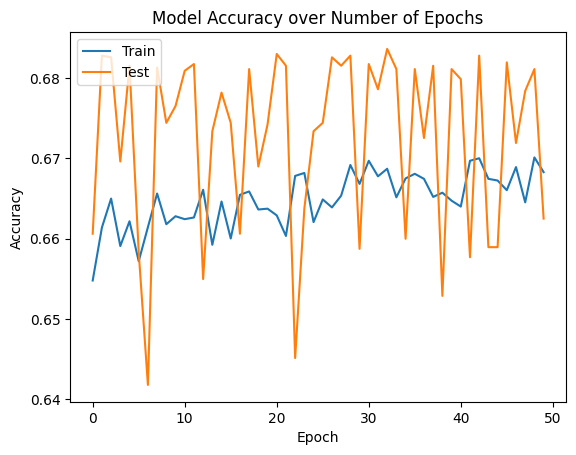

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv("international_matches.csv")

# Create a new column to represent whether the home team won or not
data["host_team_won"] = data["home_team_result"] == "Win"
features = ["home_team_fifa_rank", "away_team_fifa_rank"]
target = "host_team_won"
train_data, test_data, train_target, test_target = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=2, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# train
history = model.fit(train_data, train_target, epochs=50, validation_data=(test_data, test_target))

_, accuracy = model.evaluate(test_data, test_target)
print(f"Accuracy of model: {accuracy}")

# win of home team
host_wins = test_target[test_target == True]
host_win_percentage = len(host_wins) / len(test_target) * 100

# win of away team
away_wins = test_target[test_target == False]
away_win_percentage = len(away_wins) / len(test_target) * 100

print(f"Percentage of games won by the host team: {host_win_percentage:.2f}%")
print(f"Percentage of games won by the away team: {away_win_percentage:.2f}%")

test_data["lower_rank_team_won"] = ((test_data["home_team_fifa_rank"] > test_data["away_team_fifa_rank"]) & (
        test_target == False)) \
                                   | ((test_data["home_team_fifa_rank"] < test_data["away_team_fifa_rank"]) & (
        test_target == True))

lower_rank_wins = len(test_data[test_data["lower_rank_team_won"] == True])

print(f"The team with the lower FIFA rank won {lower_rank_wins} times in the test data.")
FIFA_correct_percentage = lower_rank_wins / len(test_data) * 100
print(f"Percentage of times FIFA was correct in the test data: {FIFA_correct_percentage:.2f}%")
print(f"Percentage of times FIFA was incorrect in the test data: {100 - FIFA_correct_percentage:.2f}%")

# Plot the model accuracy over number of epochs
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy over Number of Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()



### as we can see the accuracy of model is: 66%

using by RANDOM FOREST:

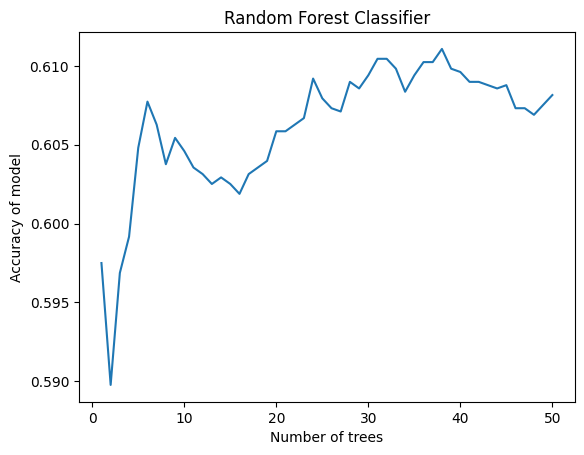

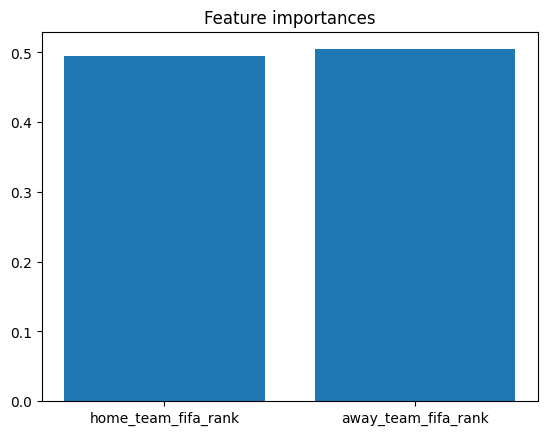

Percentage of games won by the host team: 49.57%
Percentage of games won by the away team: 50.43%
The team with the lower FIFA rank won 3251 times in the test data.
Percentage of times FIFA was correct in the test data: 67.94%
Percentage of times FIFA was incorrect in the test data: 32.06%


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv("international_matches.csv")

# Create a new column to represent whether the home team won or not
data["host_team_won"] = data["home_team_result"] == "Win"
features = ["home_team_fifa_rank", "away_team_fifa_rank"]
target = "host_team_won"
train_data, test_data, train_target, test_target = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Random Forest classifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)
accuracy_list = []
for i in range(1, 51):
    clf.set_params(n_estimators=i)
    clf.fit(train_data, train_target)
    predictions = clf.predict(test_data)
    accuracy = accuracy_score(test_target, predictions)
    accuracy_list.append(accuracy)

# Plot the accuracy over the number of trees
plt.plot(range(1, 51), accuracy_list)
plt.xlabel("Number of trees")
plt.ylabel("Accuracy of model")
plt.title("Random Forest Classifier")
plt.show()

# Plot the feature importances
importances = clf.feature_importances_
plt.bar(features, importances)
plt.title("Feature importances")
plt.show()

# win home team
host_wins = test_target[test_target == True]
host_win_percentage = len(host_wins) / len(test_target) * 100

# win away team
away_wins = test_target[test_target == False]
away_win_percentage = len(away_wins) / len(test_target) * 100

print(f"Percentage of games won by the host team: {host_win_percentage:.2f}%")
print(f"Percentage of games won by the away team: {away_win_percentage:.2f}%")

test_data["lower_rank_team_won"] = ((test_data["home_team_fifa_rank"] > test_data["away_team_fifa_rank"]) & (
        test_target == False)) \
                                   | ((test_data["home_team_fifa_rank"] < test_data["away_team_fifa_rank"]) & (
        test_target == True))

lower_rank_wins = len(test_data[test_data["lower_rank_team_won"] == True])

print(f"The team with the lower FIFA rank won {lower_rank_wins} times in the test data.")
FIFA_correct_percentage = lower_rank_wins / len(test_data) * 100
print(f"Percentage of times FIFA was correct in the test data: {FIFA_correct_percentage:.2f}%")
print(f"Percentage of times FIFA was incorrect in the test data: {100 - FIFA_correct_percentage:.2f}%")


The first graph help to determine the optimal number of trees that gives the best accuracy for the model, while
the second graph help to identify the most important features that contribute to the model's accuracy. 

### as we can see the accuracy of model with 10 trees is: 10 * 0.6 = 60%

using by LOGISTIC REGRESSION:

Accuracy of model: 0.6817136886102403
Percentage of games won by the host team: 49.57%
Percentage of games won by the away team: 50.43%
The team with the lower FIFA rank won 3251 times in the test data.
Percentage of times FIFA was correct in the test data: 67.94%
Percentage of times FIFA was incorrect in the test data: 32.06%


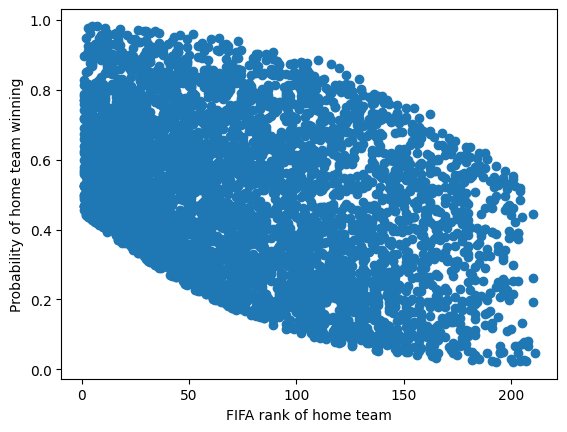

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the CSV file
data = pd.read_csv("international_matches.csv")

# Create a new column to represent whether the home team won or not
data["host_team_won"] = data["home_team_result"] == "Win"
features = ["home_team_fifa_rank", "away_team_fifa_rank"]
target = "host_team_won"
train_data, test_data, train_target, test_target = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# logistic regression classifier
clf = LogisticRegression()
clf.fit(train_data, train_target)
predictions = clf.predict(test_data)

# accuracy of the test in relation to prediction
accuracy = accuracy_score(test_target, predictions)
print(f"Accuracy of model: {accuracy}")

# win of home team
host_wins = test_target[test_target == True]
host_win_percentage = len(host_wins) / len(test_target) * 100

# win of away team
away_wins = test_target[test_target == False]
away_win_percentage = len(away_wins) / len(test_target) * 100

print(f"Percentage of games won by the host team: {host_win_percentage:.2f}%")
print(f"Percentage of games won by the away team: {away_win_percentage:.2f}%")

test_data["lower_rank_team_won"] = ((test_data["home_team_fifa_rank"] > test_data["away_team_fifa_rank"]) & (
        test_target == False)) \
                                   | ((test_data["home_team_fifa_rank"] < test_data["away_team_fifa_rank"]) & (
        test_target == True))

lower_rank_wins = len(test_data[test_data["lower_rank_team_won"] == True])

print(f"The team with the lower FIFA rank won {lower_rank_wins} times in the test data.")
FIFA_correct_percentage = lower_rank_wins / len(test_data) * 100
print(f"Percentage of times FIFA was correct in the test data: {FIFA_correct_percentage:.2f}%")
print(f"Percentage of times FIFA was incorrect in the test data: {100 - FIFA_correct_percentage:.2f}%")

# create a scatter plot of the data
probs = clf.predict_proba(test_data[features])[:, 1]
plt.scatter(test_data["home_team_fifa_rank"], probs)
plt.xlabel("FIFA rank of home team")
plt.ylabel("Probability of home team winning")
plt.show()


The graph represent the relationship between the probabibility of win to FIFA rank of home teams

### as we can see the accuracy of model is: 68%.
##### the best accuracy!!

2) What is the percentage of accuracy that the home team win?

3) What is the percentage of accuracy that the away team win?

Accuracy of model: 0.6817136886102403
Percentage of games won by the host team: 49.57%
Percentage of games won by the away team: 50.43%


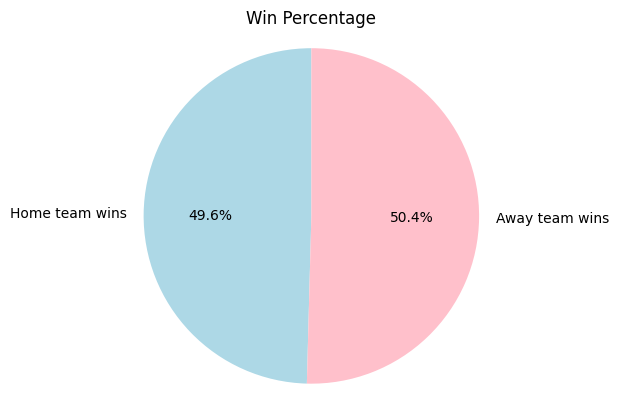

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the CSV file
data = pd.read_csv("international_matches.csv")

# Create a new column to represent whether the home team won or not
data["host_team_won"] = data["home_team_result"] == "Win"
features = ["home_team_fifa_rank", "away_team_fifa_rank"]
target = "host_team_won"
train_data, test_data, train_target, test_target = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# logistic regression classifier
clf = LogisticRegression()
clf.fit(train_data, train_target)
predictions = clf.predict(test_data)

# accuracy of the test in relation to prediction
accuracy = accuracy_score(test_target, predictions)
print(f"Accuracy of model: {accuracy}")

# win of home team
host_wins = test_target[test_target == True]
host_win_percentage = len(host_wins) / len(test_target) * 100

# win of away team
away_wins = test_target[test_target == False]
away_win_percentage = len(away_wins) / len(test_target) * 100

print(f"Percentage of games won by the host team: {host_win_percentage:.2f}%")
print(f"Percentage of games won by the away team: {away_win_percentage:.2f}%")

# plot the win percentages
labels = ["Home team wins", "Away team wins"]
sizes = [host_win_percentage, away_win_percentage]
colors = ["lightblue", "pink"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Win Percentage")
plt.show()


# conclusion:
## use by logistic regression model lead to the best percentage of accuracy

This project used in models:
- random forest
- neural network
- logistic regression